# Descripción

La compañía de seguros Sure Tomorrow quiere resolver varias tareas con la ayuda de machine learning y te pide que evalúes esa posibilidad.
- Tarea 1: encontrar clientes que sean similares a un cliente determinado. Esto ayudará a los agentes de la compañía con el marketing.
- Tarea 2: predecir la probabilidad de que un nuevo cliente reciba una prestación del seguro. ¿Puede un modelo de predictivo funcionar mejor que un modelo dummy?
- Tarea 3: predecir el número de prestaciones de seguro que un nuevo cliente pueda recibir utilizando un modelo de regresión lineal.
- Tarea 4: proteger los datos personales de los clientes sin afectar al modelo del ejercicio anterior. Es necesario desarrollar un algoritmo de transformación de datos que dificulte la recuperación de la información personal si los datos caen en manos equivocadas. Esto se denomina enmascaramiento u ofuscación de datos. Pero los datos deben protegerse de tal manera que no se vea afectada la calidad de los modelos de machine learning. No es necesario elegir el mejor modelo, basta con demostrar que el algoritmo funciona correctamente.


# Preprocesamiento y exploración de datos


In [ ]:
# Impotación de librerías
import numpy as np
import pandas as pd

import math

import seaborn as sns
import matplotlib.pyplot as plt

import sklearn.linear_model
import sklearn.metrics
import sklearn.neighbors
import sklearn.preprocessing

from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier

from sklearn.model_selection import train_test_split

from IPython.display import display

### Carga de datos

In [ ]:
# Importación de datos
df = pd.read_csv('data/insurance_us.csv')

Renombramos las columnas para que el código se vea más coherente con su estilo.

In [5]:
# Renombrar columnas para facilitar el uso
df = df.rename(columns={'Gender': 'gender', 'Age': 'age', 'Salary': 'income', 'Family members': 'family_members', 'Insurance benefits': 'insurance_benefits'})

In [6]:
# Mostrar las primeras filas del DataFrame
df.sample(20)

,gender,age,income,family_members,insurance_benefits
4663,0,37.0,37800.0,1,0
715,0,22.0,53900.0,1,0
2438,1,25.0,49600.0,6,0
2792,0,40.0,21100.0,0,0
1984,0,39.0,44600.0,3,0
4417,0,39.0,25700.0,5,0
356,1,30.0,31600.0,3,0
4738,1,24.0,48500.0,1,0
3736,1,28.0,43800.0,2,0
3487,1,22.0,46500.0,1,0


In [7]:
# Mostrar información general del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   float64
 2   income              5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_benefits  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [8]:
# Cambiar el tipo de datos de la columna 'age' a int
df['age'] = df['age'].astype(int)

In [9]:
# comprueba que la conversión se haya realizado con éxito
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   int64  
 2   income              5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_benefits  5000 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 195.4 KB


In [ ]:
# Mostrar estadísticas descriptivas del DataFrame
df.describe()

,gender,age,income,family_members,insurance_benefits
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


En la columna de Gender podemos ver que los datos no tienen ningun problema, al parecer el 50% son hombres y el otro 50% son mujeres.
En la columna de Age podemos ver que la media es de 31 y el valor mas alto encontreado es de 65 por lo que es mucha diferencia y podria haber datos atipicos, igualmente que en la columna de salary en donde vemos que la media esta alejada del minimo y maximo.
En la columna de family members y insurance benefits podemos observar que tambien la media esta alejada del valor maximo y podemos ver que esta muy alejado tambien del percentil 50 y 75 por lo que estos valores puede generar un sesgo.

## Análisis exploratorio de datos

Vamos a comprobar rápidamente si existen determinados grupos de clientes observando el gráfico de pares.

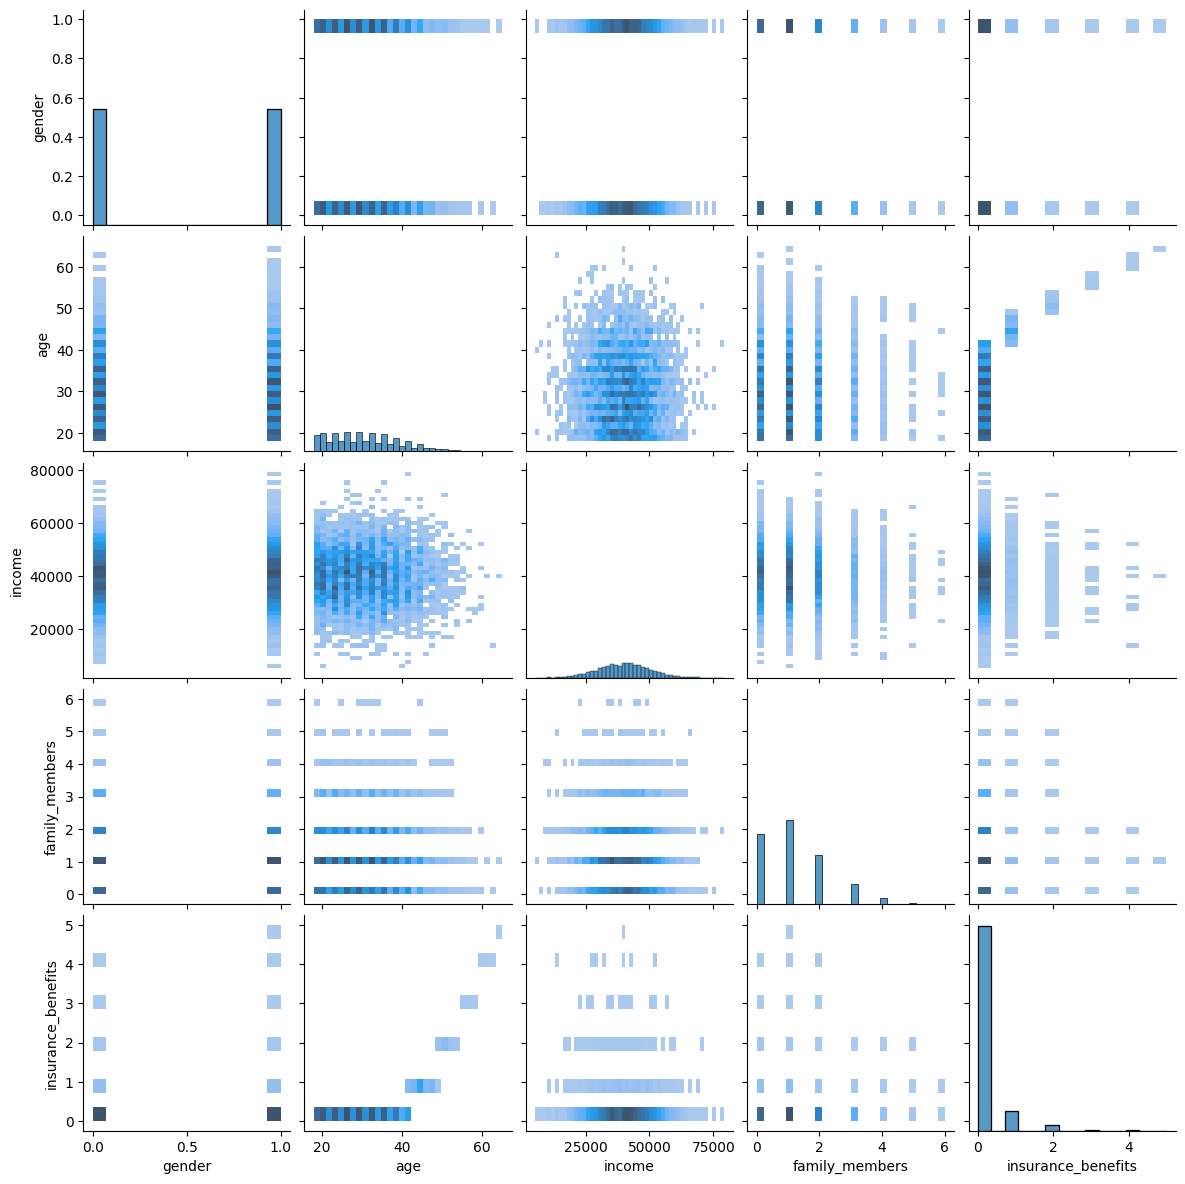

In [10]:
g = sns.pairplot(df, kind='hist')
g.fig.set_size_inches(12, 12)

De acuerdo, es un poco complicado detectar grupos obvios (clústeres) ya que es difícil combinar diversas variables simultáneamente (para analizar distribuciones multivariadas). Ahí es donde LA y ML pueden ser bastante útiles.

# Tarea 1. Clientes similares

En el lenguaje de ML, es necesario desarrollar un procedimiento que devuelva los k vecinos más cercanos (objetos) para un objeto dado basándose en la distancia entre los objetos.
Es posible que quieras revisar las siguientes lecciones (capítulo -> lección)- Distancia entre vectores -> Distancia euclidiana
- Distancia entre vectores -> Distancia Manhattan

Para resolver la tarea, podemos probar diferentes métricas de distancia.

Escribe una función que devuelva los k vecinos más cercanos para un $n^{th}$ objeto basándose en una métrica de distancia especificada. A la hora de realizar esta tarea no debe tenerse en cuenta el número de prestaciones de seguro recibidas.
Puedes utilizar una implementación ya existente del algoritmo kNN de scikit-learn (consulta [el enlace](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html#sklearn.neighbors.NearestNeighbors)) o tu propia implementación.
Pruébalo para cuatro combinaciones de dos casos- Escalado
  - los datos no están escalados
  - los datos se escalan con el escalador [MaxAbsScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html)
- Métricas de distancia
  - Euclidiana
  - Manhattan

Responde a estas preguntas:- ¿El hecho de que los datos no estén escalados afecta al algoritmo kNN? Si es así, ¿cómo se manifiesta?- ¿Qué tan similares son los resultados al utilizar la métrica de distancia Manhattan (independientemente del escalado)?

In [15]:
# Definimos las columnas que usaremos como características
feature_names = ['gender', 'age', 'income', 'family_members']

In [16]:
# Creamos una funcion para obtener los k vecinos más cercanos
def get_knn(df, n, k, metric):
    
    """
    Devuelve los k vecinos más cercanos

    :param df: DataFrame de pandas utilizado para encontrar objetos similares dentro del mismo lugar    :param n: Linea de cliente a la que buscaremos los vecinos mas cercanos   :param k: número de vecinos más cercanos a devolver
    :param métrica: nombre de la métrica de distancia    """

    # Declaramos el metodo de NearestNeighbors y lo ajustamos a los datos
    nbrs = NearestNeighbors(n_neighbors= k, metric=metric)
    # Entrenamos el modelo con los datos de entrada
    nbrs.fit(df[feature_names].values)
    # Obtenemos los k vecinos más cercanos y sus distancias
    nbrs_distances, nbrs_indices = nbrs.kneighbors([df.iloc[n][feature_names]], k, return_distance=True)
    
    # Convertimos los índices de los vecinos más cercanos a un DataFrame
    df_res = pd.concat([
        df.iloc[nbrs_indices[0]], 
        pd.DataFrame(nbrs_distances.T, index=nbrs_indices[0], columns=['distance'])
        ], axis=1)
    # Retornamos el DataFrame con los k vecinos más cercanos y sus distancias
    return df_res

Escalar datos.

In [17]:
# Entrenamos el modelo para el escalado de los datos
transformer_mas = sklearn.preprocessing.MaxAbsScaler().fit(df[feature_names].to_numpy())

# Copiamos el DataFrame original para no modificarlo 
df_scaled = df.copy()

# Transformamos los datos originales usando el transformador ajustado
df_scaled.loc[:, feature_names] = transformer_mas.transform(df[feature_names].to_numpy())

C:\Users\Usuario\AppData\Local\Temp\ipykernel_18340\2504454614.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.63076923 0.70769231 0.44615385 ... 0.30769231 0.33846154 0.43076923]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_scaled.loc[:, feature_names] = transformer_mas.transform(df[feature_names].to_numpy())
C:\Users\Usuario\AppData\Local\Temp\ipykernel_18340\2504454614.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.16666667 0.16666667 0.         ... 0.33333333 0.5        0.16666667]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_scaled.loc[:, feature_names] = transformer_mas.transform(df[feature_names].to_numpy())


In [18]:
# Verificamos que el escalado se haya realizado correctamente
df_scaled.sample(5)

,gender,age,income,family_members,insurance_benefits
875,1,0.523077,0.248101,0.500000,0
472,1,0.584615,0.463291,0.000000,0
3955,0,0.661538,0.555696,0.000000,1
4226,1,0.353846,0.477215,0.333333,0
1457,0,0.276923,0.488608,0.000000,0


Ahora, vamos a obtener registros similares para un determinado cliente y para cada combinación

In [23]:
# Obtenemos 8 vecinos más cercanos para el cliente 2 usando la métrica manhattan y con los datos escalados
manhattan_esc = get_knn(df_scaled[feature_names], 2, 8, 'manhattan')
manhattan_esc

,gender,age,income,family_members,distance
2,0,0.446154,0.265823,0.0,0.000000
509,0,0.446154,0.255696,0.0,0.010127
224,0,0.446154,0.277215,0.0,0.011392
2031,0,0.461538,0.264557,0.0,0.016650
648,0,0.461538,0.289873,0.0,0.039435
3156,0,0.446154,0.308861,0.0,0.043038
4905,0,0.492308,0.259494,0.0,0.052483
4203,0,0.446154,0.318987,0.0,0.053165


In [24]:
# Obtenemos 8 vecinos más cercanos para el cliente 2 usando la métrica euclidiana y con los datos escalados
euclidiana_esc = get_knn(df_scaled[feature_names], 2, 8, 'euclidean')
euclidiana_esc 

,gender,age,income,family_members,distance
2,0,0.446154,0.265823,0.0,0.000000
509,0,0.446154,0.255696,0.0,0.010127
224,0,0.446154,0.277215,0.0,0.011392
2031,0,0.461538,0.264557,0.0,0.015437
648,0,0.461538,0.289873,0.0,0.028550
3156,0,0.446154,0.308861,0.0,0.043038
2838,0,0.415385,0.235443,0.0,0.043240
4905,0,0.492308,0.259494,0.0,0.046586


In [25]:
# Obtenemos 8 vecinos más cercanos para el cliente 2 usando la métrica manhattan y con los datos originales
manhattan_noesc = get_knn(df[feature_names], 2, 8, 'manhattan')
manhattan_noesc

,gender,age,income,family_members,distance
2,0,29,21000.0,0,0.0
4544,1,31,21000.0,1,4.0
2031,0,30,20900.0,0,101.0
1741,1,28,21100.0,0,102.0
4805,0,28,21100.0,2,103.0
2752,1,27,21100.0,1,104.0
3848,1,35,21100.0,2,109.0
4049,0,39,20900.0,1,111.0


In [26]:
# Obtenemos 8 vecinos más cercanos para el cliente 2 usando la métrica euclidiana y con los datos originales
euclidiana_noesc = get_knn(df[feature_names], 2, 8, 'euclidean')
euclidiana_noesc 

,gender,age,income,family_members,distance
2,0,29,21000.0,0,0.000000
4544,1,31,21000.0,1,2.449490
2031,0,30,20900.0,0,100.005000
1741,1,28,21100.0,0,100.010000
4805,0,28,21100.0,2,100.024997
2752,1,27,21100.0,1,100.029996
3848,1,35,21100.0,2,100.204790
1771,1,38,20900.0,2,100.429079


**¿El hecho de que los datos no estén escalados afecta al algoritmo kNN? Si es así, ¿cómo se manifiesta?** 

Si si afecta el algoritmo ya que al procesar los datos el algoritmo sin los datos escalados el algoritmo hace calculos con una datos donde la diferencia entre cada uno de ellos le impacta al buscar los valores mas cercanos, y en el resultado con los datos escalados podemos ver que la distancia entre cada datos esta en una escala mas pequeña haciendolo mas preciso.

**¿Qué tan similares son los resultados al utilizar la métrica de distancia Manhattan (independientemente del escalado)?** 

Son muy similares en las primeros vecinos encontrados pero apartir del vecino 6/7 empieza a encontrar otra fila mas cercana y esto lo podemos saber por la formula que usa con los vectores para encontrar la distancia.

# Tarea 2. ¿Es probable que el cliente reciba una prestación del seguro?

En términos de machine learning podemos considerarlo como una tarea de clasificación binaria.

Con el valor de `insurance_benefits` superior a cero como objetivo, evalúa si el enfoque de clasificación kNN puede funcionar mejor que el modelo dummy.
Instrucciones:
- Construye un clasificador basado en KNN y mide su calidad con la métrica F1 para k=1...10 tanto para los datos originales como para los escalados. Sería interesante observar cómo k puede influir en la métrica de evaluación y si el escalado de los datos provoca alguna diferencia. Puedes utilizar una implementación ya existente del algoritmo de clasificación kNN de scikit-learn (consulta [el enlace](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)) o tu propia implementación.- Construye un modelo dummy que, en este caso, es simplemente un modelo aleatorio. Debería devolver "1" con cierta probabilidad. Probemos el modelo con cuatro valores de probabilidad: 0, la probabilidad de pagar cualquier prestación del seguro, 0.5, 1.
La probabilidad de pagar cualquier prestación del seguro puede definirse como
$$
P\{\text{prestación de seguro recibida}\}=\frac{\text{número de clientes que han recibido alguna prestación de seguro}}{\text{número total de clientes}}.
$$

Divide todos los datos correspondientes a las etapas de entrenamiento/prueba respetando la proporción 70:30.

In [27]:
# Creamos una nueva columna para clasificar si el cliente ha recibido beneficios de seguro o no
df['insurance_benefits_received'] = np.where(df['insurance_benefits']>=1,1,0)

Text(0, 0.5, 'Numero de personas')

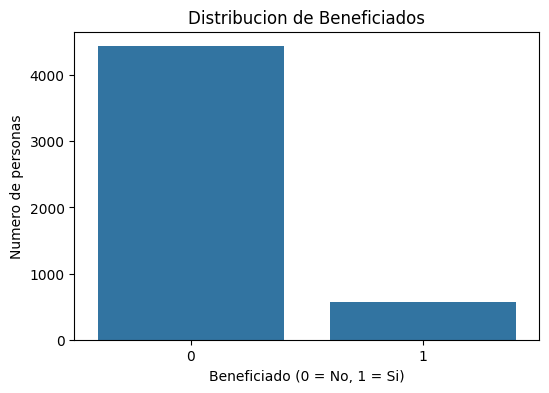

In [28]:
# comprueba el desequilibrio de clases con value_counts()
plt.figure(figsize=(6, 4))
sns.countplot(x='insurance_benefits_received' , data=df)
plt.title('Distribucion de Beneficiados')
plt.xlabel('Beneficiado (0 = No, 1 = Si)')
plt.ylabel('Numero de personas')

In [29]:
# Verificamos el balance de clases
df.groupby('insurance_benefits_received')['insurance_benefits_received'].count()

insurance_benefits_received
0    4436
1     564
Name: insurance_benefits_received, dtype: int64

In [30]:
# Creamos una funcion para evaluar el clasificador
def eval_classifier(y_true, y_pred):
    
    f1_score = sklearn.metrics.f1_score(y_true, y_pred)
    print(f'F1: {f1_score:.2f}')
    
# si tienes algún problema con la siguiente línea, reinicia el kernel y ejecuta el cuaderno de nuevo    
    cm = sklearn.metrics.confusion_matrix(y_true, y_pred, normalize='all')
    print('Matriz de confusión')
    print(cm)

In [31]:
# Creamos una funcion con un modelo dummy para predecir la clase de un cliente
def rnd_model_predict(P, size, seed=42):

    rng = np.random.default_rng(seed=seed)
    return rng.binomial(n=1, p=P, size=size)

In [32]:
# Dividir caracteristicas y objetivos en datos escalados y no escalados
obj = df['insurance_benefits_received']
car = df.drop(['insurance_benefits_received', 'insurance_benefits'], axis=1)
car_scaled = df_scaled.drop('insurance_benefits', axis=1)

car_train, car_test, obj_train, obj_test = train_test_split(car, obj, test_size=0.3, random_state=10)
car_train_scaled, car_test_scaled, obj_train_scaled, obj_test_scaled = train_test_split(car_scaled, obj, test_size=0.3, random_state=10)


In [33]:
# Ciclo for para probar modelo dummy con diferentes probabilidades
for P in [0, df['insurance_benefits_received'].sum() / len(df), 0.5, 1]:

    print(f'La probabilidad: {P:.2f}')
    y_pred_rnd = rnd_model_predict(P, len(df['insurance_benefits_received']))
        
    eval_classifier(df['insurance_benefits_received'], y_pred_rnd)
    
    print()

La probabilidad: 0.00
F1: 0.00
Matriz de confusión
[[0.8872 0.    ]
 [0.1128 0.    ]]

La probabilidad: 0.11
F1: 0.12
Matriz de confusión
[[0.7914 0.0958]
 [0.0994 0.0134]]

La probabilidad: 0.50
F1: 0.20
Matriz de confusión
[[0.456  0.4312]
 [0.053  0.0598]]

La probabilidad: 1.00
F1: 0.20
Matriz de confusión
[[0.     0.8872]
 [0.     0.1128]]



In [ ]:
# Hacemos un ciclo for para probar el modelo KNeighborsClassifier con diferentes valores de n_neighbors y lo evaluamos con la función eval_classifier
for i in range(1,11):
    print('Resultados de KNeighborClassifier con n_neighbors =', i)
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(car_train, obj_train)
    predic = model.predict(car_test)
    eval_classifier(obj_test, predic)
    print()

Resultados de KNeighborClassifier con n_neighbors = 1
F1: 0.58
Matriz de confusión
[[0.86866667 0.022     ]
 [0.056      0.05333333]]

Resultados de KNeighborClassifier con n_neighbors = 2
F1: 0.34
Matriz de confusión
[[0.88666667 0.004     ]
 [0.086      0.02333333]]

Resultados de KNeighborClassifier con n_neighbors = 3
F1: 0.37
Matriz de confusión
[[0.88066667 0.01      ]
 [0.082      0.02733333]]

Resultados de KNeighborClassifier con n_neighbors = 4
F1: 0.12
Matriz de confusión
[[0.888      0.00266667]
 [0.102      0.00733333]]

Resultados de KNeighborClassifier con n_neighbors = 5
F1: 0.14
Matriz de confusión
[[0.88533333 0.00533333]
 [0.10066667 0.00866667]]

Resultados de KNeighborClassifier con n_neighbors = 6
F1: 0.11
Matriz de confusión
[[0.88866667 0.002     ]
 [0.10266667 0.00666667]]

Resultados de KNeighborClassifier con n_neighbors = 7
F1: 0.11
Matriz de confusión
[[0.88733333 0.00333333]
 [0.10266667 0.00666667]]

Resultados de KNeighborClassifier con n_neighbors = 8
F

En el entranamiento del modelo sin escalar podemos observar que con n_neighbors = 1 es el que mejor resultados tiene, mientras va aumentando el numero de vecino va empeorando la metrica F1 al punto de que un modelo dummy con propabilidad de .5 y 1 tiene mejores resultados que uno entrenado.

In [34]:
# Hacemos un ciclo for para probar el modelo KNeighborsClassifier con diferentes valores de n_neighbors y lo evaluamos con la función eval_classifier con datos escalados
for i in range(1,11):
    print('Resultados de KNeighborClassifier con n_neighbors =', i)
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(car_train_scaled, obj_train_scaled)
    predic = model.predict(car_test_scaled)
    eval_classifier(obj_test_scaled, predic)
    print()

Resultados de KNeighborClassifier con n_neighbors = 1
F1: 0.94
Matriz de confusión
[[0.88666667 0.004     ]
 [0.00866667 0.10066667]]

Resultados de KNeighborClassifier con n_neighbors = 2
F1: 0.90
Matriz de confusión
[[0.89066667 0.        ]
 [0.01933333 0.09      ]]

Resultados de KNeighborClassifier con n_neighbors = 3
F1: 0.91
Matriz de confusión
[[0.88466667 0.006     ]
 [0.014      0.09533333]]

Resultados de KNeighborClassifier con n_neighbors = 4
F1: 0.90
Matriz de confusión
[[0.88933333 0.00133333]
 [0.01933333 0.09      ]]

Resultados de KNeighborClassifier con n_neighbors = 5
F1: 0.90
Matriz de confusión
[[0.88733333 0.00333333]
 [0.01666667 0.09266667]]

Resultados de KNeighborClassifier con n_neighbors = 6
F1: 0.89
Matriz de confusión
[[8.90000000e-01 6.66666667e-04]
 [2.13333333e-02 8.80000000e-02]]

Resultados de KNeighborClassifier con n_neighbors = 7
F1: 0.91
Matriz de confusión
[[0.888      0.00266667]
 [0.016      0.09333333]]

Resultados de KNeighborClassifier con n

Podemos observar que con el escalado de datos el entrenamiento de mejoro mucho la metrica F1 tambien podemos observar que mientras va aumentando el numero de vecinos si disminuye la metrica pero muy poco podemos deducir que este cambio esta siendo afectado por el escalado de datos que ayuda a al modelo a analizar mejor a los vecinos mas cercanos

# Tarea 3. Regresión (con regresión lineal)

Con `insurance_benefits` como objetivo, evalúa cuál sería la RECM de un modelo de regresión lineal.

Construye tu propia implementación de regresión lineal. Para ello, recuerda cómo está formulada la solución de la tarea de regresión lineal en términos de LA. Comprueba la RECM tanto para los datos originales como para los escalados. ¿Puedes ver alguna diferencia en la RECM con respecto a estos dos casos?

Denotemos- $X$: matriz de características; cada fila es un caso, cada columna es una característica, la primera columna está formada por unidades- $y$ — objetivo (un vector)- $\hat{y}$ — objetivo estimado (un vector)- $w$ — vector de pesos
La tarea de regresión lineal en el lenguaje de las matrices puede formularse así:
$$
y = Xw
$$

El objetivo de entrenamiento es entonces encontrar esa $w$ w que minimice la distancia L2 (ECM) entre $Xw$ y $y$:

$$
\min_w d_2(Xw, y) \quad \text{or} \quad \min_w \text{MSE}(Xw, y)
$$

Parece que hay una solución analítica para lo anteriormente expuesto:
$$
w = (X^T X)^{-1} X^T y
$$

La fórmula anterior puede servir para encontrar los pesos $w$ y estos últimos pueden utilizarse para calcular los valores predichos
$$
\hat{y} = X_{val}w
$$

Divide todos los datos correspondientes a las etapas de entrenamiento/prueba respetando la proporción 70:30. Utiliza la métrica RECM para evaluar el modelo.

In [35]:
# Creamos una clase para implementar la regresión lineal
class MyLinearRegression:
    
    # Definimos el constructor de la clase
    def __init__(self):
        # Inicializamos los pesos a None
        self.weights = None
    # Definimos el método fit para ajustar el modelo a los datos
    def fit(self, X, y):
        
        # Añadimos la columna de unos a la matriz de características
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)
        # Calculamos los pesos usando la fórmula de la regresión lineal
        self.weights = np.linalg.inv(X2.T@X2)@X2.T@y

    # Definimos el método predict para hacer predicciones con el modelo ajustado
    def predict(self, X):
        
        # Añadimos la columna de unos a la matriz de características
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)
        # Hacemos las predicciones multiplicando la matriz de características por los pesos
        y_pred = X2 @ self.weights
        
        # Retornamos las predicciones
        return y_pred

In [36]:
# Creamos una función para evaluar el modelo de regresión lineal
def eval_regressor(y_true, y_pred):
    
    # Calculamos el error absoluto medio (MAE) y lo imprimimos
    rmse = math.sqrt(sklearn.metrics.mean_squared_error(y_true, y_pred))
    print(f'RMSE: {rmse:.2f}')
    # Calculamos el error cuadrático medio (MSE) y lo imprimimos
    r2_score = math.sqrt(sklearn.metrics.r2_score(y_true, y_pred))
    print(f'R2: {r2_score:.2f}')    

In [38]:
# Entrenamiento de modelo regresion lineal y evaluacion con datos no escalados 
# Obtenemos las matrizes de características y objetivos para el entrenamiento y la prueba
x_train = car_train.values
y_train = obj_train.values
x_test = car_test.values
y_test = obj_test.values

# Creamos una instancia de la clase MyLinearRegression
lr = MyLinearRegression()

# Entrenamos el modelo con los datos de entrenamiento y mostramos los pesos
lr.fit(x_train, y_train)
print(lr.weights)

# Hacemos predicciones con los datos de prueba y evaluamos el modelo
y_test_pred = lr.predict(x_test)
eval_regressor(y_test, y_test_pred)

[-6.76460526e-01 -9.10304800e-04  2.50256936e-02  5.61681613e-07
 -4.62555346e-03]
RMSE: 0.24
R2: 0.64


Obtuvimos metricas que podriamos considerar regulares el error promedio que predice no tiene mucha variacion pero tambien sabemos que los numero no son tan grandes y el R2 tenemos igual un valor regular para las predicciones donde el modelo predice mucho mejor que usar la media 

In [39]:
# Entrenamiento de modelo regresion lineal y evaluacion con datos escalados
x_train_scaled = car_train_scaled.values
y_train_scaled = obj_train_scaled.values
x_test_scaled = car_test_scaled.values
y_test_scaled = obj_test_scaled.values

lr = MyLinearRegression()

lr.fit(x_train_scaled, y_train_scaled)
print(lr.weights)

y_test_pred_scaled = lr.predict(x_test_scaled)
eval_regressor(y_test_scaled, y_test_pred_scaled)

[-6.76460526e-01 -9.10304800e-04  1.62667009e+00  4.43728475e-02
 -2.77533207e-02]
RMSE: 0.24
R2: 0.64


Observamos que los resultados con datos escalados y no escalados los resultados de RMSE y R2 para 'insurance_benefits' fueron igual

# Tarea 4. Ofuscar datos

Lo mejor es ofuscar los datos multiplicando las características numéricas (recuerda que se pueden ver como la matriz $X$) por una matriz invertible $P$. 

$$
X' = X \times P
$$

Trata de hacerlo y comprueba cómo quedarán los valores de las características después de la transformación. Por cierto, la propiedad de invertibilidad es importante aquí, así que asegúrate de que $P$ sea realmente invertible.

Puedes revisar la lección 'Matrices y operaciones matriciales -> Multiplicación de matrices' para recordar la regla de multiplicación de matrices y su implementación con NumPy.

In [40]:
# Creamos una lista con las columnas de información personal que usaremos para el modelo de regresión lineal
personal_info_column_list = ['gender', 'age', 'income', 'family_members']
# Creamos un nuevo DataFrame con las columnas de información personal
df_pn = df[personal_info_column_list]

In [41]:
# Obtenemos la matriz de caracteristicas
X = df_pn.to_numpy()

Generar una matriz aleatoria $P$.

In [42]:
# Creamos una matriz para la ofucacion de la informacion personal
rng = np.random.default_rng(seed=42)
# Creamos una matriz aleatoria del tamaño de las columnas de X para que sea pueda multiplicada por la matriz de caracteristicas
P = rng.random(size=(X.shape[1], X.shape[1]))

Comprobar que la matriz P sea invertible

In [43]:
# Comprobamos que la matriz aleatoria sea invertible
y = np.linalg.inv(P)

Al no devolvernos error con la funcion para la matriz inversa cuadrada podemos saber que si es invertible

¿Puedes adivinar la edad o los ingresos de los clientes después de la transformación?

In [44]:
#Multiplicacion para obtener datos ocultos
datos_osf = X@P
datos_osf

array([[ 6359.71527314, 22380.40467609, 18424.09074184, 46000.69669016],
       [ 4873.29406479, 17160.36702982, 14125.78076133, 35253.45577301],
       [ 2693.11742928,  9486.397744  ,  7808.83156024, 19484.86063067],
       ...,
       [ 4346.2234249 , 15289.24126492, 12586.16264392, 31433.50888552],
       [ 4194.09324155, 14751.9910242 , 12144.02930637, 30323.88763426],
       [ 5205.46827354, 18314.24814446, 15077.01370762, 37649.59295455]],
      shape=(5000, 4))

No podemos saber los datos de ninguna tabla ni interpretarlo despues de multiplicarlo por una matriz revertible

¿Puedes recuperar los datos originales de $X'$ si conoces $P$? Intenta comprobarlo a través de los cálculos moviendo $P$ del lado derecho de la fórmula anterior al izquierdo. En este caso las reglas de la multiplicación matricial son realmente útiles

In [65]:
# Multiplicacion de matriz de datos ocultos por la inversa de la matriz P
datos_reales = datos_osf @ np.linalg.inv(P)
datos_reales

array([[ 1.00000000e+00,  4.10000000e+01,  4.96000000e+04,
         1.00000000e+00],
       [-4.47363596e-12,  4.60000000e+01,  3.80000000e+04,
         1.00000000e+00],
       [-2.51586878e-12,  2.90000000e+01,  2.10000000e+04,
         9.52452315e-13],
       ...,
       [-1.92837871e-12,  2.00000000e+01,  3.39000000e+04,
         2.00000000e+00],
       [ 1.00000000e+00,  2.20000000e+01,  3.27000000e+04,
         3.00000000e+00],
       [ 1.00000000e+00,  2.80000000e+01,  4.06000000e+04,
         1.00000000e+00]])

Muestra los tres casos para algunos clientes- Datos originales
- El que está transformado- El que está invertido (recuperado)

In [66]:
#Datos de los primeros 5 clientes en los datos originales, oculto e invertidos
print('Datos originales')
print(X[:5])
print('Datos ocultos')
print(datos_osf[:5])
print('Datos reales')
print(datos_reales[:5])

Datos originales
[[1.00e+00 4.10e+01 4.96e+04 1.00e+00]
 [0.00e+00 4.60e+01 3.80e+04 1.00e+00]
 [0.00e+00 2.90e+01 2.10e+04 0.00e+00]
 [0.00e+00 2.10e+01 4.17e+04 2.00e+00]
 [1.00e+00 2.80e+01 2.61e+04 0.00e+00]]
Datos ocultos
[[ 6359.71527314 22380.40467609 18424.09074184 46000.69669016]
 [ 4873.29406479 17160.36702982 14125.78076133 35253.45577301]
 [ 2693.11742928  9486.397744    7808.83156024 19484.86063067]
 [ 5345.60393712 18803.22720286 15479.14837264 38663.06186284]
 [ 3347.17673462 11782.82928336  9699.99894205 24211.27337753]]
Datos reales
[[ 1.00000000e+00  4.10000000e+01  4.96000000e+04  1.00000000e+00]
 [-4.47363596e-12  4.60000000e+01  3.80000000e+04  1.00000000e+00]
 [-2.51586878e-12  2.90000000e+01  2.10000000e+04  9.52452315e-13]
 [-4.84498208e-12  2.10000000e+01  4.17000000e+04  2.00000000e+00]
 [ 1.00000000e+00  2.80000000e+01  2.61000000e+04 -1.01990740e-13]]


Seguramente puedes ver que algunos valores no son exactamente iguales a los de los datos originales. ¿Cuál podría ser la razón de ello?

La razon podria ser que el numero tiene muchos decimales pero se aproxima a 0 por lo que si pasamos el numero a un entero obtendriamos el valor original 

## Prueba de que la ofuscación de datos puede funcionar con regresión lineal

En este proyecto la tarea de regresión se ha resuelto con la regresión lineal. Tu siguiente tarea es demostrar _analytically_ que el método de ofuscación no afectará a la regresión lineal en términos de valores predichos, es decir, que sus valores seguirán siendo los mismos. ¿Lo puedes creer? Pues no hace falta que lo creas, ¡tienes que que demostrarlo!

Entonces, los datos están ofuscados y ahora tenemos $X \times P$ en lugar de tener solo $X$. En consecuencia, hay otros pesos $w_P$ como
$$
w = (X^T X)^{-1} X^T y \quad \Rightarrow \quad w_P = [(XP)^T XP]^{-1} (XP)^T y
$$

¿Cómo se relacionarían $w$ y $w_P$ si simplificáramos la fórmula de $w_P$ anterior? 

¿Cuáles serían los valores predichos con $w_P$? 

¿Qué significa esto para la calidad de la regresión lineal si esta se mide mediante la RECM?
Revisa el Apéndice B Propiedades de las matrices al final del cuaderno. ¡Allí encontrarás fórmulas muy útiles!

No es necesario escribir código en esta sección, basta con una explicación analítica.

**Respuestas**

wp = P^−1 w

**Prueba analítica**

(a = Xw) y (á=X'Wp) donde (X'=XP) y (Wp=P^-1*W) subtituimos X' y Wp y obtenemos (á = XW = a)

De acuerdo a la prueba analitica donde subtituimos sabemos que los resultados con los datos ofuscados y los originales deben dar el mismo resultado

## Prueba de regresión lineal con ofuscación de datos

Ahora, probemos que la regresión lineal pueda funcionar, en términos computacionales, con la transformación de ofuscación elegida.
Construye un procedimiento o una clase que ejecute la regresión lineal opcionalmente con la ofuscación. Puedes usar una implementación de regresión lineal de scikit-learn o tu propia implementación.
Ejecuta la regresión lineal para los datos originales y los ofuscados, compara los valores predichos y los valores de las métricas RMSE y $R^2$. ¿Hay alguna diferencia?

**Procedimiento**

- Crea una matriz cuadrada $P$ de números aleatorios.- Comprueba que sea invertible. Si no lo es, repite el primer paso hasta obtener una matriz invertible.- <¡ tu comentario aquí !>
- Utiliza $XP$ como la nueva matriz de características

In [45]:
#Matriz cuadrada
P

array([[0.77395605, 0.43887844, 0.85859792, 0.69736803],
       [0.09417735, 0.97562235, 0.7611397 , 0.78606431],
       [0.12811363, 0.45038594, 0.37079802, 0.92676499],
       [0.64386512, 0.82276161, 0.4434142 , 0.22723872]])

In [46]:
#Comprobar que sea invertible 
P@np.linalg.inv(P)

array([[ 1.00000000e+00, -1.69848573e-16, -7.58122972e-17,
        -1.13112497e-16],
       [-6.94895396e-17,  1.00000000e+00, -7.10568689e-17,
         3.59096970e-17],
       [-1.21269339e-16, -8.01461326e-17,  1.00000000e+00,
         4.30764008e-19],
       [-3.60694539e-16, -5.55430227e-16,  3.08072404e-16,
         1.00000000e+00]])

In [ ]:
# Prueba de metricas para comparar datos ofuscados y no ofuscados
df_fin = df[feature_names]
# Caracteristicas de los datos 
car_fin = df_fin.values
# Objetivo de los datos 
obj_fin = df['insurance_benefits'].values

# Dividir los datos en conjuntos de entrenamiento y prueba
x_train_fin, x_test_fin, y_train_fin, y_test_fin = train_test_split(car_fin, obj_fin, test_size=0.3, random_state=10)

# Crear una instancia de la clase MyLinearRegression y entrenar el modelo con los datos 
lr = MyLinearRegression()
lr.fit(x_train_fin, y_train_fin)

# Hacer predicciones con los datos de prueba 
y_predic_fin = lr.predict(x_test_fin)
# Evaluar el modelo de regresión lineal con los datos de prueba
eval_regressor(y_test_fin, y_predic_fin)

RMSE: 0.35
R2: 0.63


In [ ]:
# Crear caracteristicas de los datos ofuscados
car_ofu = car_fin@P
# Dividir los datos ofuscados en conjuntos de entrenamiento y prueba
x_train_fin, x_test_fin, y_train_fin, y_test_fin = train_test_split(car_ofu, obj_fin, test_size=0.3, random_state=10)

# Crear una instancia de la clase MyLinearRegression y entrenar el modelo con los datos ofuscados
lr = MyLinearRegression()
lr.fit(x_train_fin, y_train_fin)

# Hacer predicciones con los datos de prueba ofuscados
y_predic_fin = lr.predict(x_test_fin)
eval_regressor(y_test_fin, y_predic_fin)

RMSE: 0.35
R2: 0.63


# Conclusiones

Concluimos que las metricas de R2 y RMSE no fueron afectadas por la ofucasion de los datos como se vio en el analisis de las ecuaciones

Gracias al proyecto se puso en practica las competencias y herramientas aprendidas en algebra lineal para observar su comportamiento en tareas de regresion y de clasificacion, tambien aprendimos que el escalado tiene un gran impacto en el entranamiento de KNeighbors ya que se obtiene mejores metricas en comparacion con regresion lineal que el escalado no tiene impacto.

Se adquirio conocimientos en la ofucasion de datos para proteger informacion privada con algebra lineal y que con ello no afectara la creacion de un modelo de regresion.